In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#cheking the available columns in the data set
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

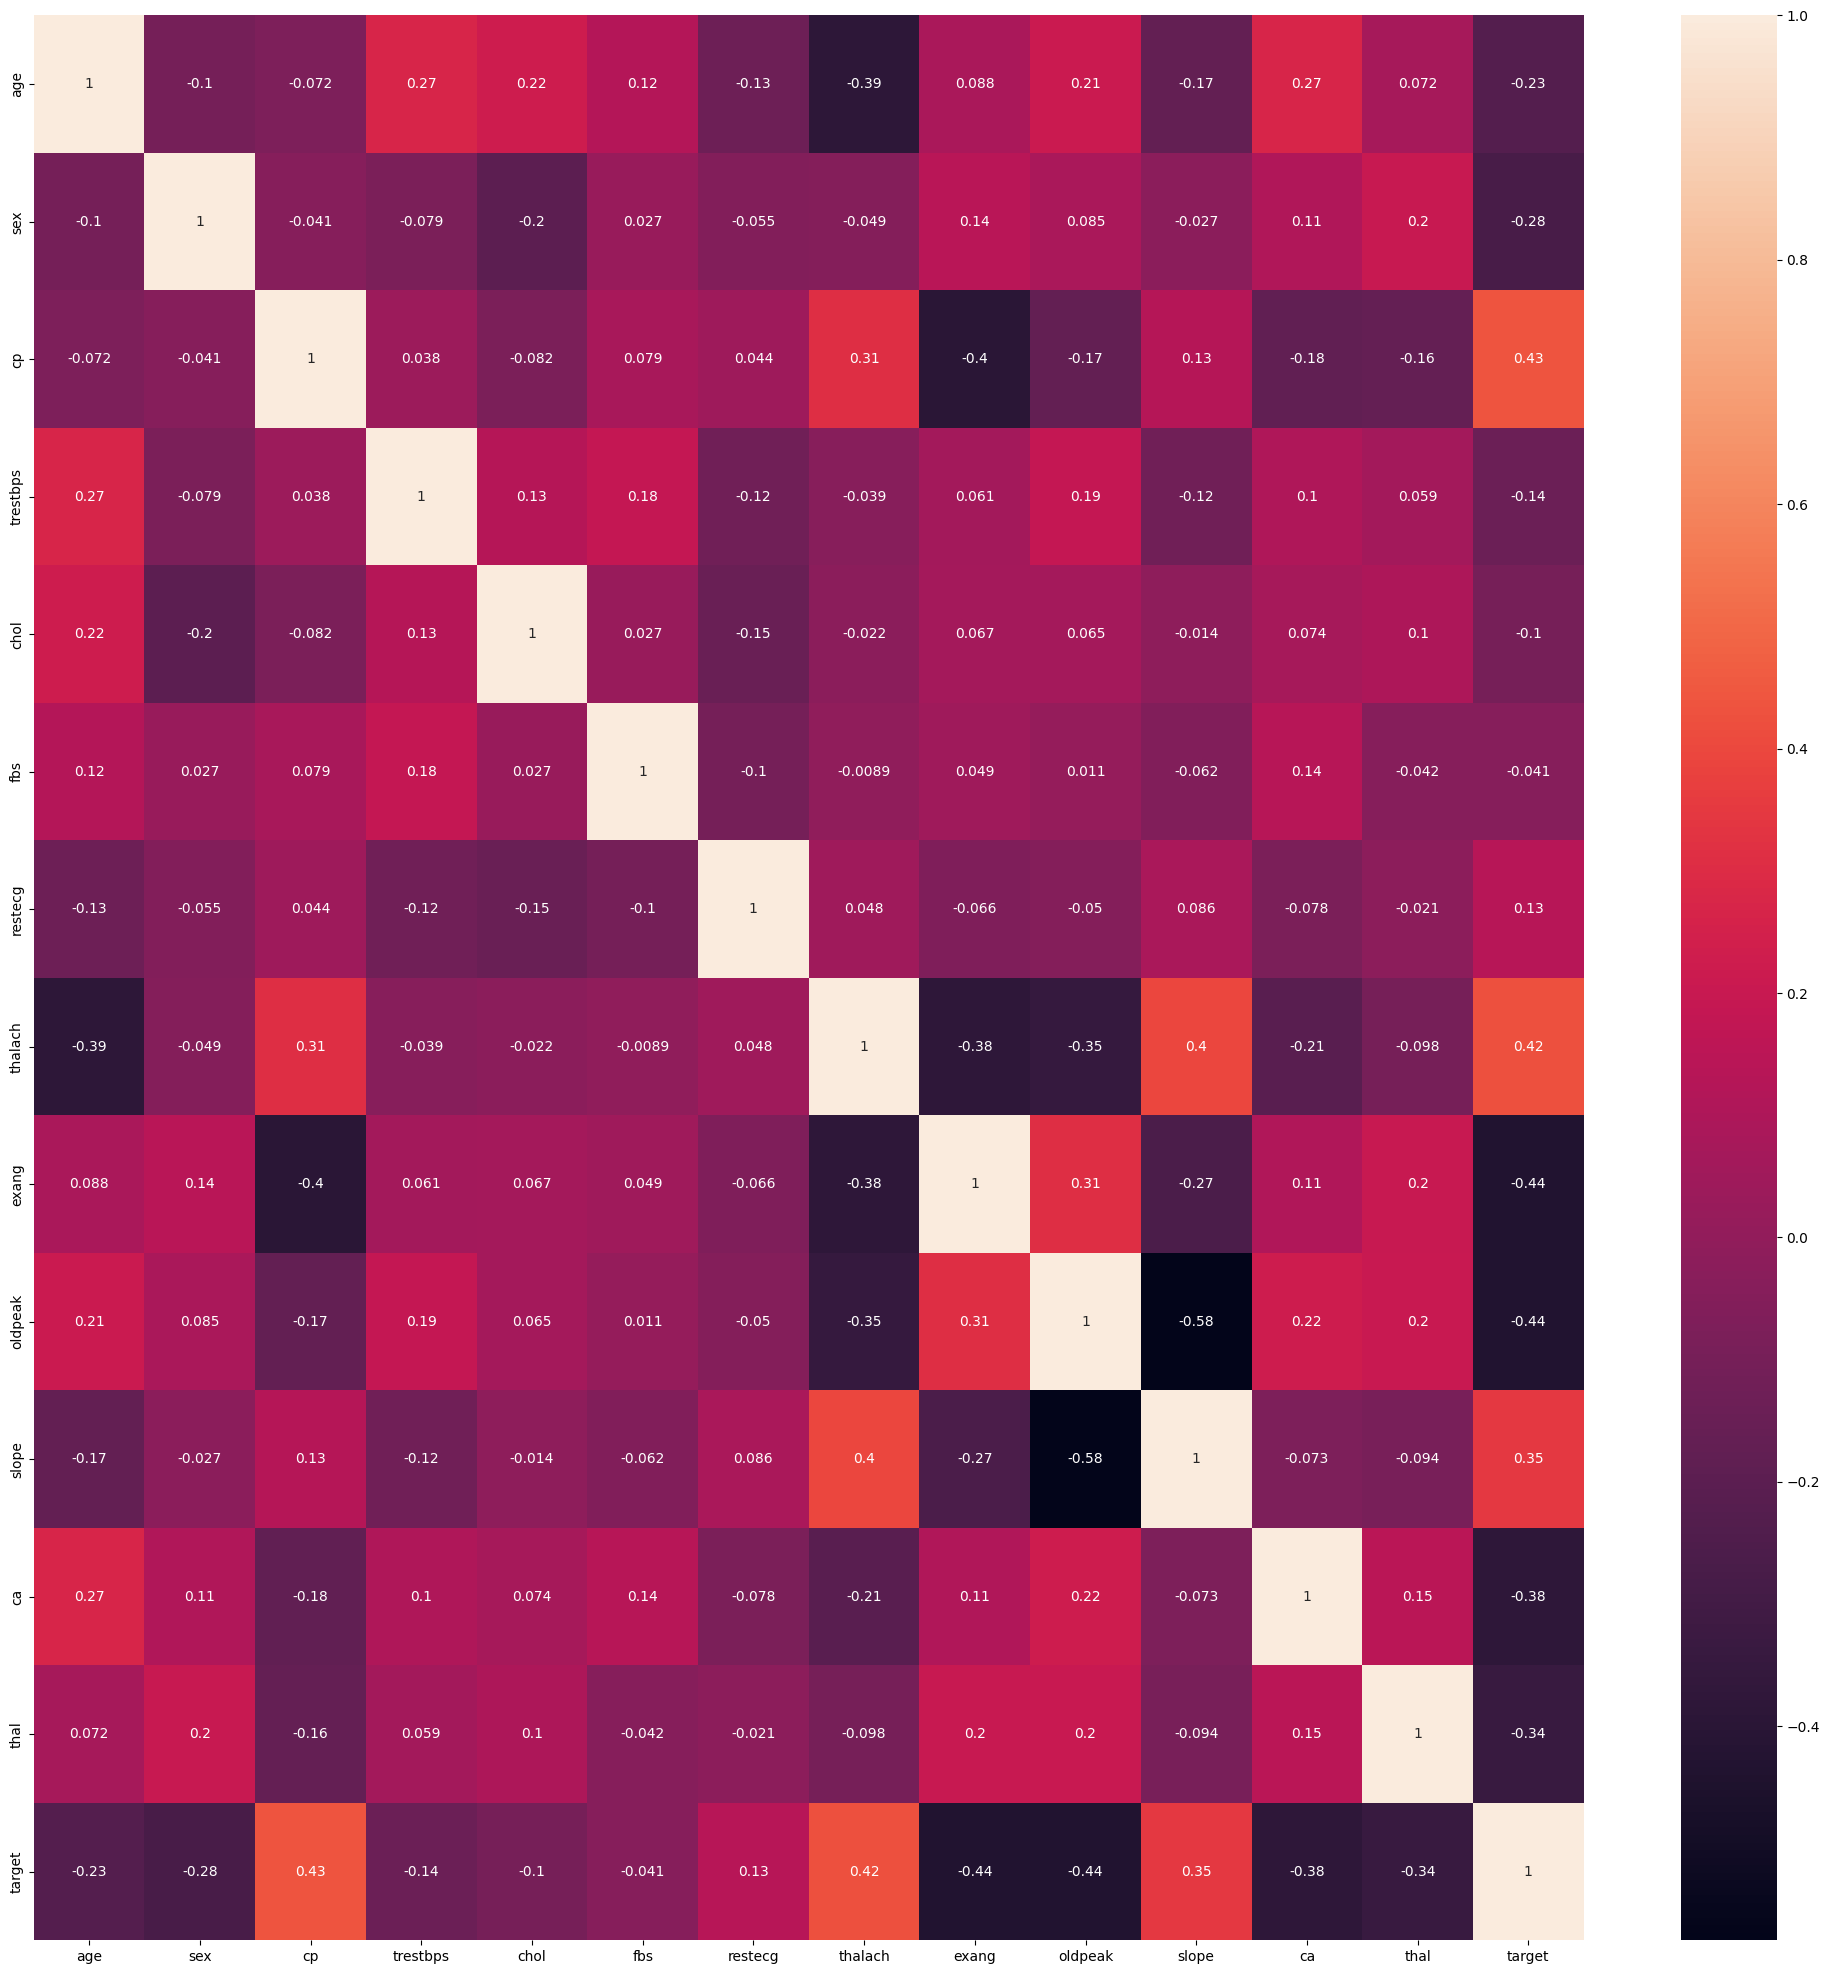

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr() , annot=True)

Data Preprocessing

In [9]:
#check null values of the trainin gdata set

df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
duplicateRows = df[df.duplicated()]
print("Number of duplicate rows:",duplicateRows.shape)

Number of duplicate rows: (723, 14)


Flag the duplicate rows

In [12]:
df['is_duplicate'] = df.duplicated()

In [13]:
df['target'].unique()

array([0, 1])

Data visualization

Separating Independant and dependant Variable

In [14]:
# Select the relevant features for K-means (excluding "Time" and "Class")
X = df.iloc[:, 0:13]  # Select columns V1 to V28 and Amount
y = df.iloc[:,13]

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Splitting training and testing data set

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# Standardize the feature values (optional but often helpful)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: title={'center': 'FBS vs Target'}, xlabel='fbs', ylabel='count'>

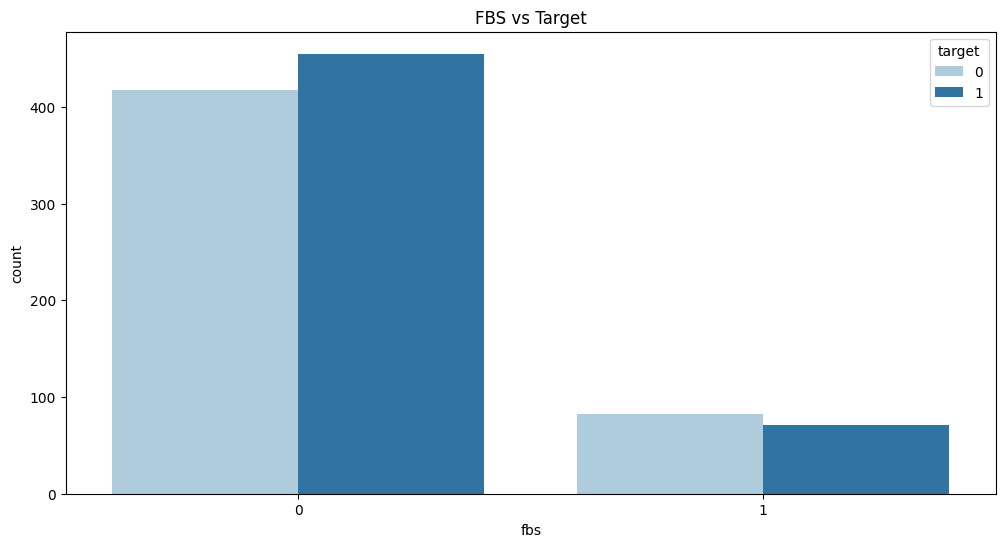

In [19]:
plt.figure(figsize=(12,6))
plt.title("FBS vs Target")
sns.countplot(x='fbs',data=df,hue='target',palette="Paired")

<Axes: title={'center': 'Sex vs Target'}, xlabel='age', ylabel='count'>

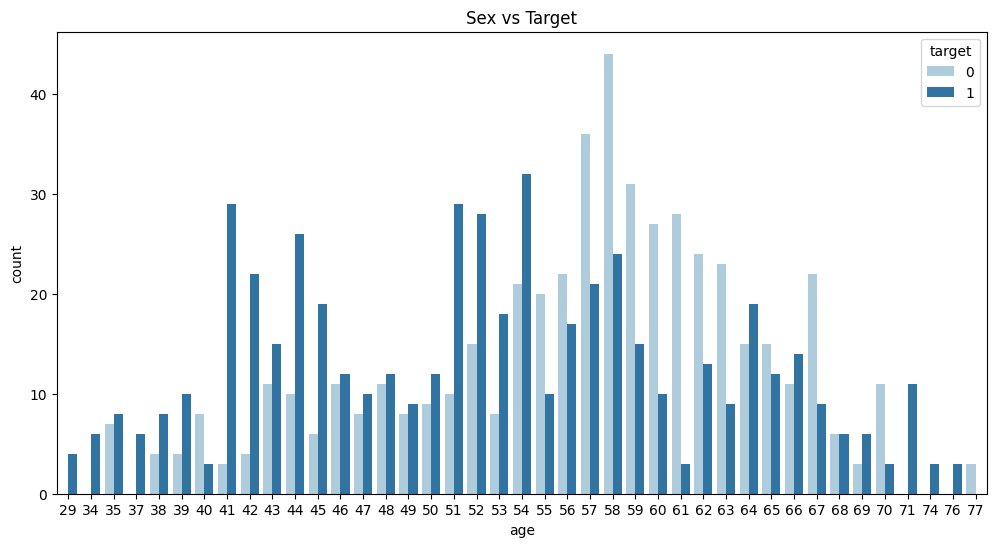

In [20]:
plt.figure(figsize=(12,6))
plt.title("Sex vs Target")
sns.countplot(x='age',data=df, hue='target',palette="Paired")

<Axes: xlabel='oldpeak'>

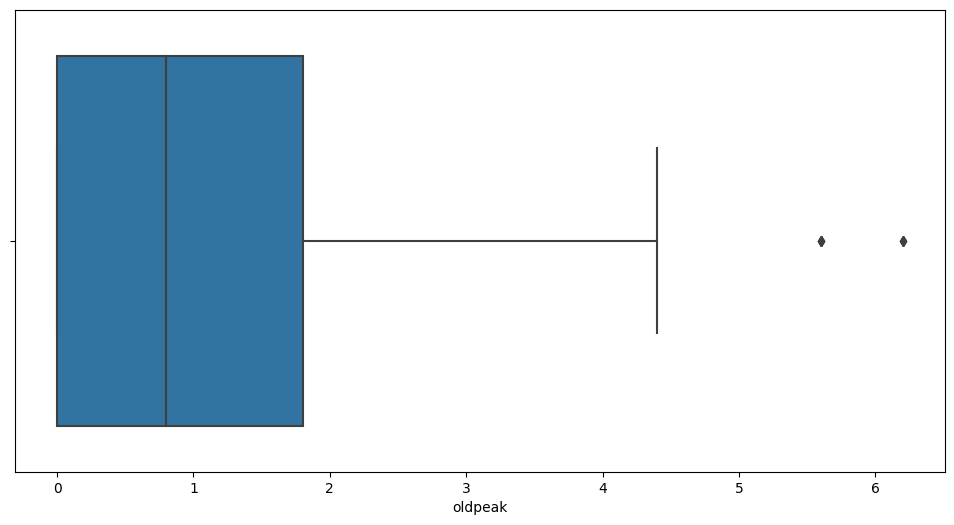

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['oldpeak'])

<Axes: xlabel='oldpeak'>

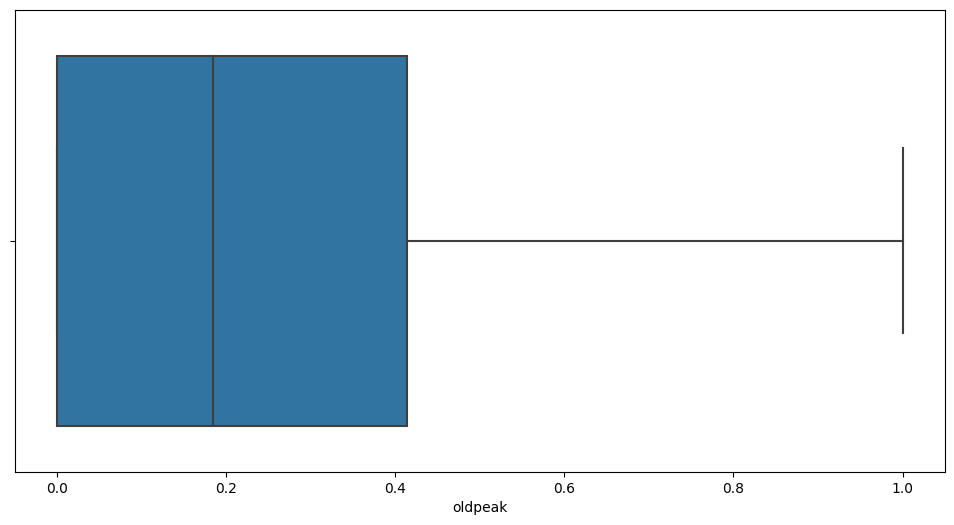

In [22]:
#removing outliers
outliers = df[df['oldpeak'] > df['oldpeak'].quantile(.99)].index
df.loc[outliers,'oldpeak'] = df['oldpeak'].quantile(.99)
scaler = MinMaxScaler()
df['oldpeak'] = scaler.fit_transform(df['oldpeak'].values.reshape(-1,1))
plt.figure(figsize=(12,6))
sns.boxplot(x=df['oldpeak'])

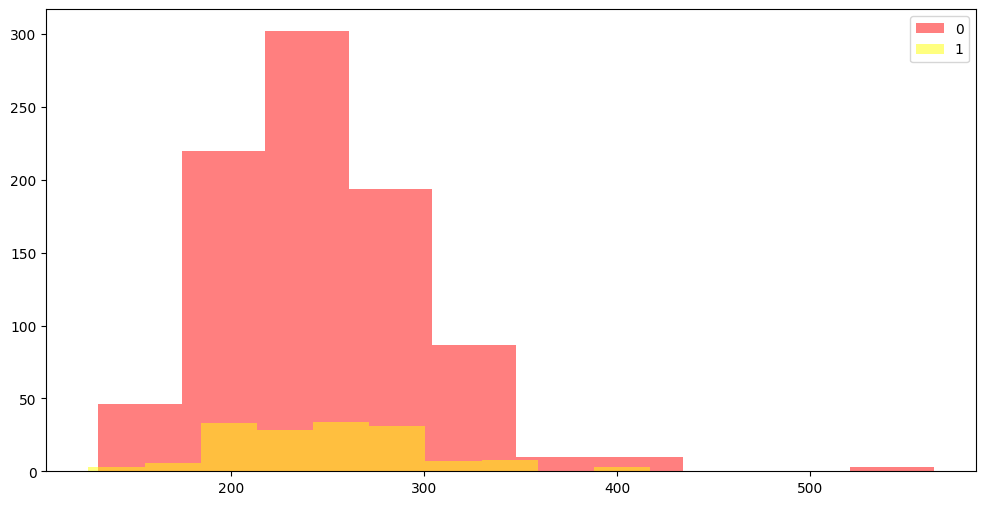

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df[df['fbs']==0]['chol'],color='red',alpha=0.5,label='0')
plt.hist(df[df['fbs']==1]['chol'],color='yellow',alpha=0.5,label='1')

plt.legend()

Model training

In [24]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.25)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/50
20/20 [==============================] - 2s 15ms/step - loss: 0.5465 - accuracy: 0.7285 - val_loss: 0.4805 - val_accuracy: 0.7805
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8683 - val_loss: 0.4256 - val_accuracy: 0.7951
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.8862 - val_loss: 0.4126 - val_accuracy: 0.8098
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.8959 - val_loss: 0.3888 - val_accuracy: 0.8390
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2507 - accuracy: 0.9057 - val_loss: 0.3848 - val_accuracy: 0.8537
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9073 - val_loss: 0.3758 - val_accuracy: 0.8537
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9154 - val_loss: 0.3525 - val_accuracy: 0.8634
Epoch 8/50
20/20 [=

In [26]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step
